# Logistic Regression

    Name: Dao Hoai Linh

    Class: ML_01

In [6]:
import numpy as np 
from numpy import log,dot,exp,shape
import pandas as pd
import matplotlib.pyplot as plt # Các bạn có thể thử plot chart bằng plotly
from sklearn.model_selection import train_test_split  


# 1: Implement hàm sigmoid

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


# 2: Implement lại Logistic Regression

In [8]:
def standardize(X):
    #(X - Xmean)/Xstandard
    X_std = (X-np.mean(X))/np.std(X)
    return X_std


In [9]:
def f1_score(y, y_hat):
    tp = sum((y == 1) & (y_hat == 1))
    fp = sum((y == 0) & (y_hat == 1))
    fn = sum((y == 1) & (y_hat == 0))
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1 = 2 * precision * recall / (precision + recall)

    return f1


In [10]:
#Chạy thử f1_score
print('--For understanding f1 score--\n')
y = np.array([1, 1, 0, 1, 0, 0, 1, 0])
y_hat = np.array([1, 0, 1, 1, 0, 0, 1, 1])
tp = sum((y == 1)&(y_hat == 1))
fp = sum((y == 0)&(y_hat == 1))
fn = sum((y == 1)&(y_hat == 0))

print('y:\n', y)
print('y_hat:\n', y_hat)
print('\ntrue positive = ', tp)
print('false positive = ', fp)
print('false negative = ', fn)
print('\nf1 score = ',f1_score(y, y_hat))


--For understanding f1 score--

y:
 [1 1 0 1 0 0 1 0]
y_hat:
 [1 0 1 1 0 0 1 1]

true positive =  3
false positive =  2
false negative =  1

f1 score =  0.6666666666666665


In [11]:
class LogisticRegression:
    def __init__(self, lr = 0.001, iters = 500, threshold = 0.5):
        self.lr = lr
        self.iters = iters
        self.threshold = threshold
        self.w = None
    
    def _initialize(self, X):
        self.w = np.zeros((X.shape[1]+1, 1))
        self.X = np.column_stack([np.ones(len(X)), X])
        
    def set_lr(self, new_lr):
        self.lr = new_lr
        
    def set_iters(self, new_iters):
        self.iters = new_iters

    def fit(self, X, y):
        self._initialize(X)
        self.losslist = []

        for i in range(self.iters):
            y_hat = sigmoid(self.X@self.w)
            dw = self.X.T@(y_hat-y)
            self.w = self.w-self.lr*dw
            loss = -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
            self.losslist.append(loss)
            
    @property
    
    def loss_hist(self):
        plt.plot(self.losslist)
        plt.scatter([i for i in range(self.iters)], np.array(self.losslist), color='red')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        
        plt.show()
        
    def predict(self,X):
        self._initialize(X)
        y_pred = sigmoid(self.X@self.w)
        y_pred[y_pred>=self.threshold] = 1
        y_pred[y_pred<self.threshold] = 0
        return y_pred.ravel().astype(int)


# 3a: Tạo dữ liệu

In [12]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_classes=2, n_redundant=0, n_samples = 200, random_state=42)


# 3b: Visualize dữ liệu

In [13]:

X_class0 = X[y == 0]
X_class1 = X[y == 1]

plt.scatter(X_class0[:, 0], X_class0[:, 1], color='red', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization')

plt.legend()
plt.show()


# 3c: Chia dữ liệu thành train và test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4: Fit dữ liệu với Logistic Regression

In [15]:
X_train = standardize(X_train)
X_test = standardize(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


# 4b: Tính f1-score

In [16]:
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)
print("f1 score train =", f1_score_train)
print("f1 score test =", f1_score_test)


f1 score train = 0.6610878661087867
f1 score test = 0.6885245901639345


# 4c: Visualize loss

In [17]:
logreg.loss_hist


In [18]:
new_lr = 0.086 
new_iters = 977
logreg.set_lr(new_lr)
logreg.set_iters(new_iters)
logreg.fit(X_train, y_train)

logreg.loss_hist


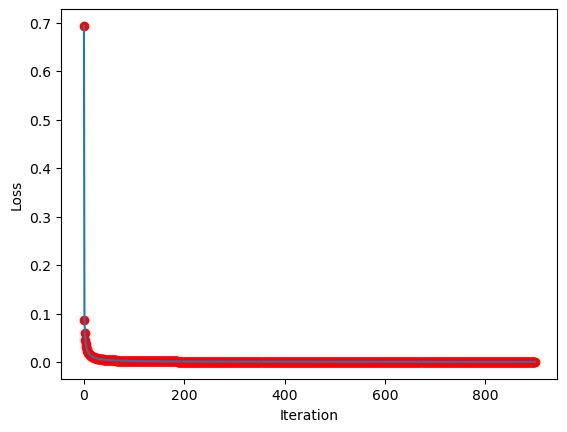

In [19]:
new_lr = 0.03
new_iters = 900
logreg.set_lr(new_lr)
logreg.set_iters(new_iters)
logreg.fit(X_train, y_train)

logreg.loss_hist
